# Random Forest

### Setup

In [2]:
# Import necessary packages
import numpy as np # Numerical computation package
import pandas as pd # Dataframe package
import matplotlib.pyplot as plt # Plotting package
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Random Forest estimator
from sklearn.metrics import mean_absolute_error # Metrics
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV # Grid search function
from PIL import Image

np.random.seed(1) # Set the random seed for reproduceability

In [25]:
# Load the data and clean the Columns
ped = pd.read_csv("data_clean_with_dummies.csv")
ped = ped.drop(["Unnamed: 0"], axis = 1)

# Define a new X with the squared feature k = 0.99, 57+46
X = ped[ped.columns[57:103]]


# Without CPA
#X = ped[ped.columns[3:57]]


# Output to predict
y = ped["pedestrians count"]

# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)

## Exploration

### Establish baseline

In [267]:
def mae_score_measure_all(model):
    mae_train = mean_absolute_error(ytrain, model.predict(Xtrain))
    mae_test = mean_absolute_error(ytest, model.predict(Xtest))
    score_train = model.score(Xtrain, ytrain)
    score_test = model.score(Xtest, ytest)
    return mae_train, mae_test, score_train, score_test
    

# Initiate Random Forest with standard parameters as a basline
forest_baseline = RandomForestRegressor(random_state=144,n_jobs=-1)
forest_baseline.fit(Xtrain, ytrain)

rf_mae_train_baseline, rf_mae_test_baseline, rf_score_train_baseline, rf_score_test_basline = mae_score_measure_all(forest_baseline)

In [275]:
# Print results
print("----- Baseline MAE and Score -----")
print()
print("-- Training data MAE --")
print(f"Random forest MAE   :   {rf_mae_train_baseline:>10.2f}")
print(f"Random forest Score :   {rf_score_train_baseline:>10.2f}")
print()
print("-- Validation data MAE --")
print(f"Random forest MAE   : {rf_mae_test_baseline:>10.2f}")
print(f"Random forest Score : {rf_score_test_basline:>10.2f}")

# Setting the baseline as the best values and change it if better appear
rf_mae_train_best = rf_mae_train_baseline
rf_score_train_best = rf_score_train_baseline
rf_mae_test_best = rf_mae_test_baseline
rf_score_test_best = rf_score_test_basline

----- Baseline MAE and Score -----

-- Training data MAE --
Random forest MAE   :       148.60
Random forest Score :         0.99

-- Validation data MAE --
Random forest MAE   :     340.00
Random forest Score :       0.94


----- Baseline MAE and Score -----

-- Training data MAE --

Random forest MAE   :       148.60

Random forest Score :         0.99

-- Validation data MAE --

Random forest MAE   :     340.00

Random forest Score :       0.94

### Exploratory Parameter analasys

Estimators1

In [209]:
#n_estimators: how many trees should we consider , Defalut = 100
n_estimators = [x for x in range(50, 601, 50)]
#ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning,  Defalut = 0
ccp_alpha = [x for x in np.linspace(0, 0.1, 11)]
#The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node  Defalut = None, only measurabel, when using high numbers
max_depth = [x for x in range(10, 121, 10)]
##################################################max_depth.append(99999)

# This resembles the number of maximum features provided to each tree in a random forest,  Defalut = 1
max_features = [x for x in range(1, 41, 2)]

max_features_decimal = [x for x in np.linspace(0.1, 1, 1)]
##################################################max_features.extend(["sqrt", "log2", None])

# min_sample_split: the minimum required number of observations in node in order to split it  Defalut = 2
min_samples_split = [x for x in range(8, 15, 1)]
# min_samples_leaf: minimum number of samples that should be present in the leaf node after splitting a node  Defalut = 1
min_samples_leaf = [x for x in range(1, 15, 1)]

#Create a dict with all parameters
all_parameters_dict = {"n_estimators":n_estimators, "ccp_alpha":ccp_alpha, "max_depth":max_depth, "max_features":max_features,"max_features_decimal":max_features_decimal,
                        "min_samples_split":min_samples_split, "min_samples_leaf":min_samples_leaf}

Estimators2

In [34]:
#n_estimators: how many trees should we consider , Defalut = 100
n_estimators = [x for x in range(400, 601, 50)]
#ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning,  Defalut = 0
ccp_alpha = [x for x in np.linspace(0, 0.2, 10)]
#The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node  Defalut = None, only measurabel, when using high numbers
max_depth = [x for x in range(10, 30, 2)]
max_depth2 = [x for x in range(180, 201, 10)]
max_depth.extend(max_depth2)
##################################################max_depth.append(99999)

# This resembles the number of maximum features provided to each tree in a random forest,  Defalut = 1
max_features = [x for x in range(50, 60, 2)]
max_features.insert(0,1)

max_features_decimal = [x for x in np.linspace(0.1, 1, 1)]

##################################################max_features.extend(["sqrt", "log2", None])

# min_sample_split: the minimum required number of observations in node in order to split it  Defalut = 2
min_samples_split = [x for x in range(12, 30, 2)]
# min_samples_leaf: minimum number of samples that should be present in the leaf node after splitting a node  Defalut = 1
min_samples_leaf = [x for x in np.linspace(2, 6, 10)]


#Create a dict with all parameters
all_parameters_dict = {"n_estimators":n_estimators, "ccp_alpha":ccp_alpha, "max_depth":max_depth, "max_features":max_features,"max_features_decimal":max_features_decimal,
                        "min_samples_split":min_samples_split, "min_samples_leaf":min_samples_leaf}

Estimator 3

In [16]:
#n_estimators: how many trees should we consider , Defalut = 100
n_estimators = [x for x in range(50, 800, 50)]
#ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning,  Defalut = 0
ccp_alpha = [x for x in np.linspace(0, 0.3, 30)]
#The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node  Defalut = None, only measurabel, when using high numbers
max_depth = [x for x in range(10, 30, 2)]
max_depth2 = [x for x in range(30, 201, 10)]
max_depth.extend(max_depth2)
##################################################max_depth.append(99999)

# This resembles the number of maximum features provided to each tree in a random forest,  Defalut = 1
max_features = [x for x in range(1, 41, 2)]

max_features_decimal = [x for x in np.linspace(0.01, 1, 20)]

##################################################max_features.extend(["sqrt", "log2", None])

# min_sample_split: the minimum required number of observations in node in order to split it  Defalut = 2
min_samples_split = [x for x in range(2, 30, 1)]
# min_samples_leaf: minimum number of samples that should be present in the leaf node after splitting a node  Defalut = 1
min_samples_leaf = [x for x in range(1, 15, 1)]

#Create a dict with all parameters
all_parameters_dict = {"n_estimators":n_estimators, "ccp_alpha":ccp_alpha, "max_depth":max_depth, "max_features":max_features,"max_features_decimal":max_features_decimal,
                        "min_samples_split":min_samples_split, "min_samples_leaf":min_samples_leaf}

Testing parameters on Default tree

In [18]:
# Creating lists for all values given by filure whatever
def list_appending(model):
   model.fit(Xtrain, ytrain)
   score_train.append(model.score(Xtrain, ytrain))
   score_test.append(model.score(Xtest, ytest))
   MAE_train.append(mean_absolute_error(ytrain, model.predict(Xtrain)))
   MAE_test.append(mean_absolute_error(ytest, model.predict(Xtest)))



#Setting the n_jobs
jobs = -2

score_train_total = []
score_test_total = []
MAE_train_total = []
MAE_test_total = []
print("start")
#Loop over lis with all parameters
i = 0
for parameter_n in list(all_parameters_dict.values()):
   #create a list for all scores for the different Models
   score_train = []
   score_test = []
   MAE_train = []
   MAE_test = []
   #for parameter n_estimator
   if parameter_n == list(all_parameters_dict.values())[0]:
      print(i /len(list(all_parameters_dict.values())))
#go over all different N_estimators
      for ne in list(all_parameters_dict.values())[0]:
      #grow and fit the forest
         forest_base_changed = RandomForestRegressor(n_estimators=ne, random_state=144,n_jobs=jobs)
         list_appending(forest_base_changed)
      i = i+1
   ################################################################################################
   if parameter_n == list(all_parameters_dict.values())[1]:
      print(i /len(list(all_parameters_dict.values())))
#go over all different ccp_alpha
      for ne in list(all_parameters_dict.values())[1]:
         #grow and fit the forest
         forest_base_changed = RandomForestRegressor(ccp_alpha=ne, random_state=144,n_jobs=jobs)
         list_appending(forest_base_changed)
      i = i+1
   ################################################################################################
   if parameter_n == list(all_parameters_dict.values())[2]:
      print(i /len(list(all_parameters_dict.values())))
#go over all different N_estimators
      for ne in list(all_parameters_dict.values())[2]:
         #grow and fit the forest
         forest_base_changed = RandomForestRegressor(max_depth=ne, random_state=144,n_jobs=jobs)
         list_appending(forest_base_changed)
      i = i+1
   ###########################################################################################################
   if parameter_n == list(all_parameters_dict.values())[3]:
      print(i /len(list(all_parameters_dict.values())))
#go over all different N_estimators
      for ne in list(all_parameters_dict.values())[3]:
         #grow and fit the forest
         forest_base_changed = RandomForestRegressor(max_features=ne, random_state=144,n_jobs=jobs)
         list_appending(forest_base_changed)
      i = i+1
   ###########################################################################################################
   # THIS IS FOR THE DECIMAL MAX FEATURE
   ###########################################################################################################
   if parameter_n == list(all_parameters_dict.values())[4]:
      print(i /len(list(all_parameters_dict.values())))
#go over all different N_estimators
      for ne in list(all_parameters_dict.values())[4]:
         #grow and fit the forest
         forest_base_changed = RandomForestRegressor(max_features=ne, random_state=144,n_jobs=jobs)
         list_appending(forest_base_changed)
      i = i+1
   ###########################################################################################################
   if parameter_n == list(all_parameters_dict.values())[5]:
      print(i /len(list(all_parameters_dict.values())))
#go over all different N_estimators
      for ne in list(all_parameters_dict.values())[5]:
         #grow and fit the forest
         forest_base_changed = RandomForestRegressor(min_samples_split=ne, random_state=144,n_jobs=jobs)
         list_appending(forest_base_changed)
      i = i+1
   ###########################################################################################################
   if parameter_n == list(all_parameters_dict.values())[6]:
      print(i /len(list(all_parameters_dict.values())))
#go over all different N_estimators
      for ne in list(all_parameters_dict.values())[6]:
         #grow and fit the forest
         forest_base_changed = RandomForestRegressor(min_samples_leaf=ne, random_state=144,n_jobs=jobs)
         list_appending(forest_base_changed)
      i = i+1
   ###########################################################################################################
      print(i /len(list(all_parameters_dict.values())))
#add this scores to the total score list
      
   #After If
   score_train_total.append(score_train)
   score_test_total.append(score_test)
   MAE_train_total.append(MAE_train)
   MAE_test_total.append(MAE_test)

start
0.0
0.14285714285714285
0.2857142857142857
0.42857142857142855
0.5714285714285714
0.7142857142857143
0.8571428571428571
1.0


In [4]:
#To save tha values for later
print(score_train_total,score_test_total,MAE_train_total,MAE_test_total)

NameError: name 'score_train_total' is not defined

For the first:

[[0.9883148323895521, 0.9885641307841996, 0.9886535070045926, 0.9887821287488149, 0.9888259380622331, 0.9888659029968215, 0.9888737648723838, 0.9888575254678814, 0.9888326630486622, 0.9888799247117469, 0.9888555507976431, 0.9889042720032142], [0.9885641307841996, 0.988563865576797, 0.9885635621606668, 0.9885633755530476, 0.988563016805102, 0.9885628489693631, 0.9885625671304171, 0.988562260965149, 0.9885620078641172, 0.988561616950566, 0.9885612493915056], [0.9549355994206329, 0.9870032456038443, 0.9885479199303213, 0.9885584317352778, 0.9885643078332068, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996], [0.9807476707706404, 0.9844451261760018, 0.9862512899541499, 0.986977952450395, 0.987544363149793, 0.9878111831235886, 0.9880389994232419, 0.9883625317569422, 0.9883734750110952, 0.9886946532544013, 0.9886819556932607, 0.9889229519214344, 0.9887838463333074, 0.9887559111724148, 0.9889146772717934, 0.9889364801649787, 0.9889525077557305, 0.988914422798607, 0.9889642999370172, 0.9889048464788144], [0.9885641307841996, 0.987890216516839, 0.9869942513154959, 0.9860747643759804, 0.9850736038472081, 0.9840873505474232, 0.9830639954136825, 0.9820863567771991, 0.9810742399449485, 0.9801187117670559, 0.9792582101969849, 0.9784348589856595, 0.9774683711091371], [0.9885641307841996, 0.9849108621818958, 0.9808887398396537, 0.9768667388175984, 0.9731733813318763, 0.9700478548586796, 0.9673175489516828, 0.9645845458008687, 0.9620148457449438, 0.9597516873041028, 0.9575818550985884, 0.9554473302833931, 0.953277551786317, 0.9514028996167414]] [[0.9408332654866445, 0.9417090031776849, 0.9426687056981793, 0.9428466447190603, 0.9433013279207194, 0.9433379911283247, 0.9436241191840352, 0.9434536411831066, 0.9435584901078073, 0.9436030697828183, 0.9436520394323606, 0.9436860060233953], [0.9417090031776849, 0.9417088554313655, 0.9417086738229739, 0.9417088100780105, 0.9417088285169184, 0.9417089089120575, 0.9417084138331723, 0.9417083386153045, 0.9417084568274369, 0.9417084412486676, 0.9417086475462754], [0.9343231141281216, 0.9423972395760509, 0.9420986649166239, 0.9415348089707412, 0.941690963524233, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849], [0.8882986421045476, 0.9158740941737659, 0.928288055860715, 0.9342035012102011, 0.9374697939173237, 0.9395468190501209, 0.9421608177372309, 0.9430743795398904, 0.9430035384259007, 0.9441506505243935, 0.9448575071623042, 0.9458353880464637, 0.9453957285271233, 0.9452581228785237, 0.9451875282713492, 0.9464912444733709, 0.9464737484684363, 0.9451332686251545, 0.9460570278032464, 0.9455714722538724], [0.9417090031776849, 0.9421989947425826, 0.9424991365833821, 0.9423171475815695, 0.9427234005870636, 0.94276149716987, 0.9425031452080902, 0.94284342875038, 0.9427760820740253, 0.942948695388893, 0.9436926379695757, 0.9437872068181982, 0.9437190133922108], [0.9417090031776849, 0.9435784385195114, 0.9441914826339923, 0.9440755032984371, 0.9437431100103214, 0.943297153089113, 0.9433542050920195, 0.9424561279317353, 0.941394610630752, 0.9408117385552921, 0.940046655549776, 0.939489340123586, 0.9384179763287585, 0.9379682783691424]] [[150.81786139091915, 149.6815765655223, 148.97744179598868, 148.7416976618007, 148.55029796864324, 148.1756283649563, 148.1557975492658, 148.1256091163126, 148.238021142007, 147.9887038649015, 148.05948781718118, 147.92719322163495], [149.6815765655223, 149.7723211680427, 149.8599409111144, 149.9378726357596, 150.01186656311077, 150.0825071754844, 150.14844577561738, 150.21333891574054, 150.27110506041575, 150.33202776473064, 150.3883583922141], [341.48547592516223, 170.77429936390436, 150.91933086484622, 149.6258586813344, 149.68578537947582, 149.6815765655223, 149.6815765655223, 149.68157656552236, 149.68157656552236, 149.6815765655223, 149.6815765655223, 149.6815765655223], [232.7174647415014, 189.71119847924427, 174.77684551558778, 168.76389901006743, 163.89418355491793, 161.04566795412597, 159.3444094260881, 156.6220774648814, 156.81142182771237, 153.80629996687807, 154.45821699013393, 151.2292561603074, 152.63684487385484, 151.70694302926273, 150.52932166549212, 149.89487473891742, 149.82653270358063, 149.45326223504145, 148.7148947094869, 148.9385682317192], [149.68157656552233, 153.48016380133564, 158.71914797989092, 165.1295842364544, 171.59531295706924, 178.05485137734013, 184.70659437697256, 190.53038589139152, 196.8353514332237, 202.09529584538728, 207.2789822815427, 212.07118914043647, 216.92626370699492], [149.68157656552233, 168.2749983859422, 189.4041836351781, 209.6310190041442, 227.42514025340358, 241.65073352039147, 254.488541303598, 266.18597843648524, 276.6496768175575, 286.093782040575, 294.4859084414285, 302.93895233502417, 310.8641069445193, 318.10157433899815]] [[347.54411310729444, 344.8315861855159, 344.02288186406895, 343.4931575007657, 342.9547708938968, 342.6552645553794, 342.5370049816789, 342.655815244067, 342.4069206157488, 342.4079904034768, 342.19417121312614, 342.16264466217336], [344.8315861855159, 344.81447120592395, 344.80178869004, 344.78994528352774, 344.77799625113744, 344.77171706328386, 344.7658682700799, 344.76196876732024, 344.7496772073766, 344.7399571122737, 344.72609362867155], [402.3803578567484, 341.56497138421946, 342.17665258947534, 344.45156676826923, 344.8835648639013, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159], [574.0728931782796, 462.1691125578704, 418.07236675582084, 401.14653801273835, 388.56102592454806, 380.6305967145256, 372.3024217475474, 368.80684556494697, 366.03115251598325, 360.2650063200989, 358.0016789649815, 351.8720582992312, 352.4052734753913, 350.09160474623155, 349.9618446393498, 345.9973674602549, 347.24028609296397, 345.332571042769, 344.2344450999485, 343.2546772009216], [344.8315861855159, 344.0798067399723, 343.75465563989087, 344.33383368163595, 342.352731629111, 342.3232409227082, 343.02270445493986, 342.5792274431331, 343.1148897739765, 342.7803584797767, 341.5303386815333, 341.6330680629022, 342.364899223389], [344.8315861855159, 338.55364958047227, 336.8012856398014, 336.81202651047283, 337.73677166475613, 338.2574180987674, 339.9981394802743, 343.03657151536083, 346.8296064848177, 349.8667167338806, 352.1147692822997, 354.97686600217276, 358.9778829104884, 361.79440347273834]]

For teh secound:

[[0.9888575254678814, 0.9888326630486622, 0.9888799247117469, 0.9888555507976431, 0.9889042720032142], [0.9885641307841996, 0.9885635300906446, 0.9885629279986852, 0.9885624255389829, 0.9885616541265269, 0.9885610014272808, 0.9885603589271654, 0.9885596702549322, 0.9885588725035993, 0.9885584142251004], [0.9549355994206329, 0.9697288753776158, 0.9781695027671216, 0.9829915463622507, 0.9856359215896638, 0.9870032456038443, 0.9877828129514972, 0.9881446515110442, 0.9883720776711831, 0.988514446410157, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996], [0.9807476707706404, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996], [0.9792582101969849, 0.9774683711091371, 0.9757166478129571, 0.9740576125618338, 0.9723627280451084, 0.9707187526473907, 0.9691699398431499, 0.9675551419435696, 0.9664012746654143], [-2.8312219235715474e-10, -2.8312241440175967e-10, -2.8312241440175967e-10, -2.8312219235715474e-10, -2.8312219235715474e-10, -2.8312219235715474e-10, -2.8312241440175967e-10, -2.8312241440175967e-10, -2.8312219235715474e-10, -2.8312219235715474e-10]] [[0.9434536411831066, 0.9435584901078073, 0.9436030697828183, 0.9436520394323606, 0.9436860060233953], [0.9417090031776849, 0.9417084131545117, 0.9417088267003595, 0.9417081726202085, 0.9417084986762038, 0.94170812086172, 0.9417089294741958, 0.9417091246299232, 0.941710214638425, 0.9417116137773911], [0.9343231141281216, 0.9397147407952298, 0.9414502676270108, 0.9420181134608656, 0.9422802412689556, 0.9423972395760509, 0.9428526857459995, 0.942241254223621, 0.9428306381876758, 0.9422596976455244, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849], [0.8882986421045476, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849], [0.9436926379695757, 0.9437190133922108, 0.9435322542319576, 0.9435527024364103, 0.9428304721888391, 0.9427001571066654, 0.942233556206276, 0.9418381622336871, 0.9416595663420968], [-4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05, -4.855039612605694e-05]] [[148.1256091163126, 148.238021142007, 147.9887038649015, 148.05948781718118, 147.92719322163495], [149.68157656552233, 149.87727509005163, 150.04524853565522, 150.1901095186535, 150.32520236998465, 150.4448696198361, 150.55057969692842, 150.6498564081874, 150.7474647940924, 150.8358999463212], [341.48547592516223, 281.18720605870806, 237.0996860309178, 206.16864251197788, 184.53119422521672, 170.77429936390433, 161.76330359435735, 157.02243321524938, 154.1011375405454, 151.82484273766553, 149.6815765655223, 149.68157656552233, 149.6815765655223], [232.7174647415014, 149.6815765655223, 149.6815765655223, 149.6815765655223, 149.68157656552233, 149.68157656552233], [207.2789822815427, 216.92626370699494, 226.3887207803371, 234.38498934024182, 242.08384156077304, 249.14116614887152, 255.38212537881572, 261.5150746826853, 266.73087275673566], [2656.4893414296166, 2656.4893414296166, 2656.4893414296157, 2656.4893414296157, 2656.4893414296157, 2656.4893414296157, 2656.4893414296157, 2656.4893414296166, 2656.4893414296166, 2656.4893414296157]] [[342.655815244067, 342.4069206157488, 342.4079904034768, 342.19417121312614, 342.16264466217336], [344.8315861855159, 344.80116838678805, 344.77668893266014, 344.7598639394348, 344.740115664208, 344.7211385120819, 344.71097597393504, 344.6936120486399, 344.67876890599615, 344.664403565785], [402.3803578567484, 374.6684836837586, 357.8575075735068, 348.7122519089652, 343.50221838541466, 341.56497138421946, 340.2314380801709, 341.1811459717688, 341.69530379730804, 342.45775219760077, 344.8315861855159, 344.8315861855159, 344.8315861855159], [574.0728931782796, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159], [341.5303386815333, 342.364899223389, 343.2544451533146, 343.1312315679995, 344.8414190937105, 345.24665229628795, 346.338630419733, 347.7798896819186, 348.70641287355886], [2664.577282292878, 2664.577282292878, 2664.577282292878, 2664.5772822928784, 2664.577282292878, 2664.5772822928784, 2664.5772822928784, 2664.5772822928784, 2664.5772822928784, 2664.577282292878]]

For the thrid:

[[0.9883148323895521, 0.9885641307841996, 0.9886535070045926, 0.9887821287488149, 0.9888259380622331, 0.9888659029968215, 0.9888737648723838, 0.9888575254678814, 0.9888326630486622, 0.9888799247117469, 0.9888555507976431, 0.9889042720032142, 0.988920478201943, 0.9889313088317123, 0.9889325551618289], [0.9885641307841996, 0.9885638532346193, 0.9885635467055378, 0.9885633654044296, 0.9885630070662293, 0.9885627717138097, 0.9885624938186869, 0.9885621188874802, 0.9885618508144339, 0.9885615422524604, 0.9885611720600589, 0.9885609513801209, 0.9885606414804463, 0.9885603274850421, 0.9885600251736733, 0.9885596773463501, 0.9885594318316722, 0.9885589114639534, 0.9885586856343364, 0.9885584812022766, 0.9885582113370944, 0.9885577976164804, 0.9885574066949758, 0.9885570926585342, 0.9885568464239095, 0.9885564735408499, 0.9885561010307239, 0.988555915343547, 0.9885557519556756, 0.9885555981954479], [0.9549355994206329, 0.9697288753776158, 0.9781695027671216, 0.9829915463622507, 0.9856359215896638, 0.9870032456038443, 0.9877828129514972, 0.9881446515110442, 0.9883720776711831, 0.988514446410157, 0.9885479199303213, 0.9885584317352778, 0.9885643078332068, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996, 0.9885641307841996], [0.9807476707706404, 0.9844451261760018, 0.9862512899541499, 0.986977952450395, 0.987544363149793, 0.9878111831235886, 0.9880389994232419, 0.9883625317569422, 0.9883734750110952, 0.9886946532544013, 0.9886819556932607, 0.9889229519214344, 0.9887838463333074, 0.9887559111724148, 0.9889146772717934, 0.9889364801649787, 0.9889525077557305, 0.988914422798607, 0.9889642999370172, 0.9889048464788144], [0.9807476707706404, 0.9837877882068693, 0.9862512899541499, 0.986977952450395, 0.9877657865895749, 0.9879814414131096, 0.988164533206986, 0.9883734750110952, 0.9886946532544013, 0.9887624827223815, 0.9888276440805955, 0.988941985842044, 0.9889146772717934, 0.9889364801649787, 0.9889618845298821, 0.9889187289824479, 0.9889275685395598, 0.9886715367641044, 0.9886452450322037, 0.9885641307841996], [0.9885641307841996, 0.987890216516839, 0.9869942513154959, 0.9860747643759804, 0.9850736038472081, 0.9840873505474232, 0.9830639954136825, 0.9820863567771991, 0.9810742399449485, 0.9801187117670559, 0.9792582101969849, 0.9784348589856595, 0.9774683711091371, 0.9765533398943824, 0.9757166478129571, 0.9748235559147753, 0.9740576125618338, 0.9731639134286202, 0.9723627280451084, 0.9715281343016603, 0.9707187526473907, 0.9699750734360862, 0.9691699398431499, 0.9685098592071851, 0.9675551419435696, 0.966926416338317, 0.9664012746654143, 0.965927702317353], [0.9885641307841996, 0.9849108621818958, 0.9808887398396537, 0.9768667388175984, 0.9731733813318763, 0.9700478548586796, 0.9673175489516828, 0.9645845458008687, 0.9620148457449438, 0.9597516873041028, 0.9575818550985884, 0.9554473302833931, 0.953277551786317, 0.9514028996167414]] [[0.9408332654866445, 0.9417090031776849, 0.9426687056981793, 0.9428466447190603, 0.9433013279207194, 0.9433379911283247, 0.9436241191840352, 0.9434536411831066, 0.9435584901078073, 0.9436030697828183, 0.9436520394323606, 0.9436860060233953, 0.9437277061034705, 0.9438184060576488, 0.9437978681091037], [0.9417090031776849, 0.941708827742616, 0.9417084118647876, 0.9417088779379754, 0.9417087113420297, 0.9417088979297045, 0.9417086402397438, 0.9417082550280192, 0.9417084020758645, 0.9417084976566867, 0.9417085875726602, 0.9417081185570462, 0.9417081136046785, 0.9417089161020598, 0.9417084746031182, 0.9417091380245491, 0.9417096507905992, 0.941710051304373, 0.9417110461284607, 0.9417112233792089, 0.941712491389737, 0.941712699547384, 0.9417133495155191, 0.9417140077397442, 0.9417149238817091, 0.941715564514428, 0.9417161015921095, 0.9417157066245576, 0.9417156541199865, 0.9417155688670936], [0.9343231141281216, 0.9397147407952298, 0.9414502676270108, 0.9420181134608656, 0.9422802412689556, 0.9423972395760509, 0.9428526857459995, 0.942241254223621, 0.9428306381876758, 0.9422596976455244, 0.9420986649166239, 0.9415348089707412, 0.941690963524233, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849, 0.9417090031776849], [0.8882986421045476, 0.9158740941737659, 0.928288055860715, 0.9342035012102011, 0.9374697939173237, 0.9395468190501209, 0.9421608177372309, 0.9430743795398904, 0.9430035384259007, 0.9441506505243935, 0.9448575071623042, 0.9458353880464637, 0.9453957285271233, 0.9452581228785237, 0.9451875282713492, 0.9464912444733709, 0.9464737484684363, 0.9451332686251545, 0.9460570278032464, 0.9455714722538724], [0.8882986421045476, 0.9080424356910867, 0.928288055860715, 0.9342035012102011, 0.9398674034811427, 0.9407563135262753, 0.9420929201217283, 0.9430035384259007, 0.9441506505243935, 0.9449620229326783, 0.94591552404969, 0.9454712755003253, 0.9451875282713492, 0.9464912444733709, 0.9459288065113981, 0.9454269883121982, 0.9455118973556014, 0.9444556411741127, 0.943681631371752, 0.9417090031776849], [0.9417090031776849, 0.9421989947425826, 0.9424991365833821, 0.9423171475815695, 0.9427234005870636, 0.94276149716987, 0.9425031452080902, 0.94284342875038, 0.9427760820740253, 0.942948695388893, 0.9436926379695757, 0.9437872068181982, 0.9437190133922108, 0.9438471237535728, 0.9435322542319576, 0.9438016624108121, 0.9435527024364103, 0.943112550655934, 0.9428304721888391, 0.9426298642143935, 0.9427001571066654, 0.9422379853990347, 0.942233556206276, 0.9419028167646212, 0.9418381622336871, 0.9415651576566221, 0.9416595663420968, 0.9415816926067082], [0.9417090031776849, 0.9435784385195114, 0.9441914826339923, 0.9440755032984371, 0.9437431100103214, 0.943297153089113, 0.9433542050920195, 0.9424561279317353, 0.941394610630752, 0.9408117385552921, 0.940046655549776, 0.939489340123586, 0.9384179763287585, 0.9379682783691424]] [[150.81786139091915, 149.6815765655223, 148.97744179598868, 148.7416976618007, 148.55029796864324, 148.17562836495634, 148.15579754926577, 148.12560911631263, 148.238021142007, 147.9887038649015, 148.05948781718118, 147.92719322163495, 147.93866559501996, 147.89785477935501, 147.9243054711187], [149.6815765655223, 149.77561710024278, 149.8662815515766, 149.94540082813276, 150.0227431514529, 150.09405041552495, 150.16176891807666, 150.22871465472167, 150.2904308687333, 150.34782387210174, 150.40594135290576, 150.45601254640053, 150.50897964855696, 150.5548100873281, 150.60154563219078, 150.64849753177083, 150.69309024837153, 150.7397758981673, 150.78342141098318, 150.82507977176522, 150.86184400020562, 150.90252842780507, 150.94514317231796, 150.98395006198058, 151.02050060996112, 151.05692975819485, 151.09130346056816, 151.12865087673566, 151.16622088221152, 151.19705129755545], [341.48547592516223, 281.18720605870806, 237.0996860309178, 206.16864251197788, 184.53119422521672, 170.77429936390433, 161.76330359435735, 157.02243321524938, 154.10113754054535, 151.82484273766553, 150.91933086484622, 149.62585868133445, 149.68578537947582, 149.68157656552233, 149.68157656552236, 149.68157656552233, 149.6815765655223, 149.68157656552233, 149.68157656552233, 149.6815765655223, 149.6815765655223, 149.68157656552236, 149.68157656552236, 149.6815765655223, 149.6815765655223, 149.6815765655223, 149.6815765655223, 149.68157656552233], [232.71746474150143, 189.71119847924427, 174.77684551558778, 168.76389901006743, 163.89418355491793, 161.04566795412597, 159.3444094260881, 156.62207746488136, 156.81142182771237, 153.80629996687807, 154.45821699013393, 151.22925616030741, 152.63684487385484, 151.70694302926273, 150.52932166549212, 149.89487473891742, 149.82653270358063, 149.45326223504145, 148.7148947094869, 148.9385682317192], [232.7174647415014, 198.3106968848284, 174.77684551558778, 168.76389901006743, 161.89848932457463, 160.25657332974262, 157.95120534413905, 156.81142182771237, 153.80629996687807, 153.01420779881875, 151.8382455670996, 150.97235197573744, 150.52932166549212, 149.89487473891742, 149.7849344150139, 149.71795605869326, 149.1021560564113, 148.8072320154032, 149.20883741944363, 149.68157656552236], [149.68157656552233, 153.4801638013356, 158.71914797989092, 165.1295842364544, 171.59531295706924, 178.05485137734013, 184.70659437697253, 190.53038589139152, 196.8353514332237, 202.09529584538728, 207.2789822815427, 212.07118914043653, 216.92626370699494, 221.85618103891463, 226.38872078033714, 230.7158810111478, 234.3849893402418, 238.50382407881764, 242.08384156077304, 245.5515269342686, 249.14116614887152, 252.2443741044382, 255.38212537881572, 258.4397655843146, 261.5150746826853, 264.40294441782464, 266.7308727567356, 269.12232876597795], [149.68157656552233, 168.27499838594218, 189.4041836351781, 209.63101900414418, 227.42514025340358, 241.65073352039147, 254.488541303598, 266.18597843648524, 276.6496768175575, 286.09378204057487, 294.4859084414285, 302.93895233502417, 310.8641069445193, 318.10157433899815]] [[347.54411310729444, 344.8315861855159, 344.02288186406895, 343.4931575007657, 342.9547708938968, 342.6552645553794, 342.5370049816789, 342.655815244067, 342.4069206157488, 342.4079904034768, 342.19417121312614, 342.16264466217336, 342.2600529426809, 342.1169877442849, 342.18532580919356], [344.8315861855159, 344.8148309395083, 344.80079247581796, 344.78861064678864, 344.7782443039608, 344.7720788308581, 344.76270025774494, 344.75863647785377, 344.74497616124313, 344.73748936303804, 344.7234726253255, 344.71788754592944, 344.7166686217489, 344.7116008906828, 344.7121135452745, 344.6929978696522, 344.6867971960126, 344.68032969484835, 344.6736216839486, 344.6657421889029, 344.6543071362444, 344.649462127677, 344.64071003411806, 344.6355015746775, 344.6305444913755, 344.6269098684837, 344.62618854279464, 344.62207283308373, 344.61981511176265, 344.61866908104037], [402.38035785674845, 374.6684836837586, 357.8575075735068, 348.7122519089652, 343.5022183854147, 341.56497138421946, 340.2314380801709, 341.18114597176873, 341.69530379730804, 342.4577521976007, 342.17665258947534, 344.45156676826923, 344.88356486390126, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159, 344.8315861855159], [574.0728931782796, 462.1691125578704, 418.07236675582084, 401.14653801273835, 388.561025924548, 380.6305967145256, 372.3024217475474, 368.80684556494697, 366.03115251598325, 360.2650063200989, 358.0016789649815, 351.8720582992312, 352.4052734753913, 350.09160474623155, 349.96184463934986, 345.9973674602548, 347.24028609296397, 345.33257104276896, 344.2344450999485, 343.2546772009216], [574.0728931782796, 489.05391727981703, 418.07236675582084, 401.14653801273835, 381.1413329785329, 377.10855076230433, 370.46786420442015, 366.03115251598325, 360.2650063200989, 354.47539371290725, 351.0337724230462, 349.7842762018436, 349.96184463934986, 345.9973674602548, 344.78856538921264, 346.4843281637525, 342.8645429609995, 343.22193078634814, 343.46929228326167, 344.83158618551585], [344.8315861855159, 344.0798067399723, 343.75465563989087, 344.33383368163595, 342.352731629111, 342.3232409227082, 343.02270445493986, 342.5792274431331, 343.1148897739765, 342.78035847977674, 341.5303386815333, 341.63306806290217, 342.364899223389, 342.1429335149353, 343.2544451533146, 342.6724798277529, 343.1312315679995, 344.1116884099873, 344.8414190937105, 345.6960738563744, 345.24665229628795, 346.3332027596457, 346.338630419733, 347.0499444824883, 347.7798896819186, 348.43976367139436, 348.70641287355886, 349.05448116896565], [344.8315861855159, 338.5536495804723, 336.8012856398014, 336.81202651047283, 337.73677166475613, 338.25741809876746, 339.9981394802743, 343.0365715153608, 346.8296064848177, 349.8667167338806, 352.1147692822997, 354.97686600217276, 358.97788291048846, 361.7944034727383]]

Visualize results

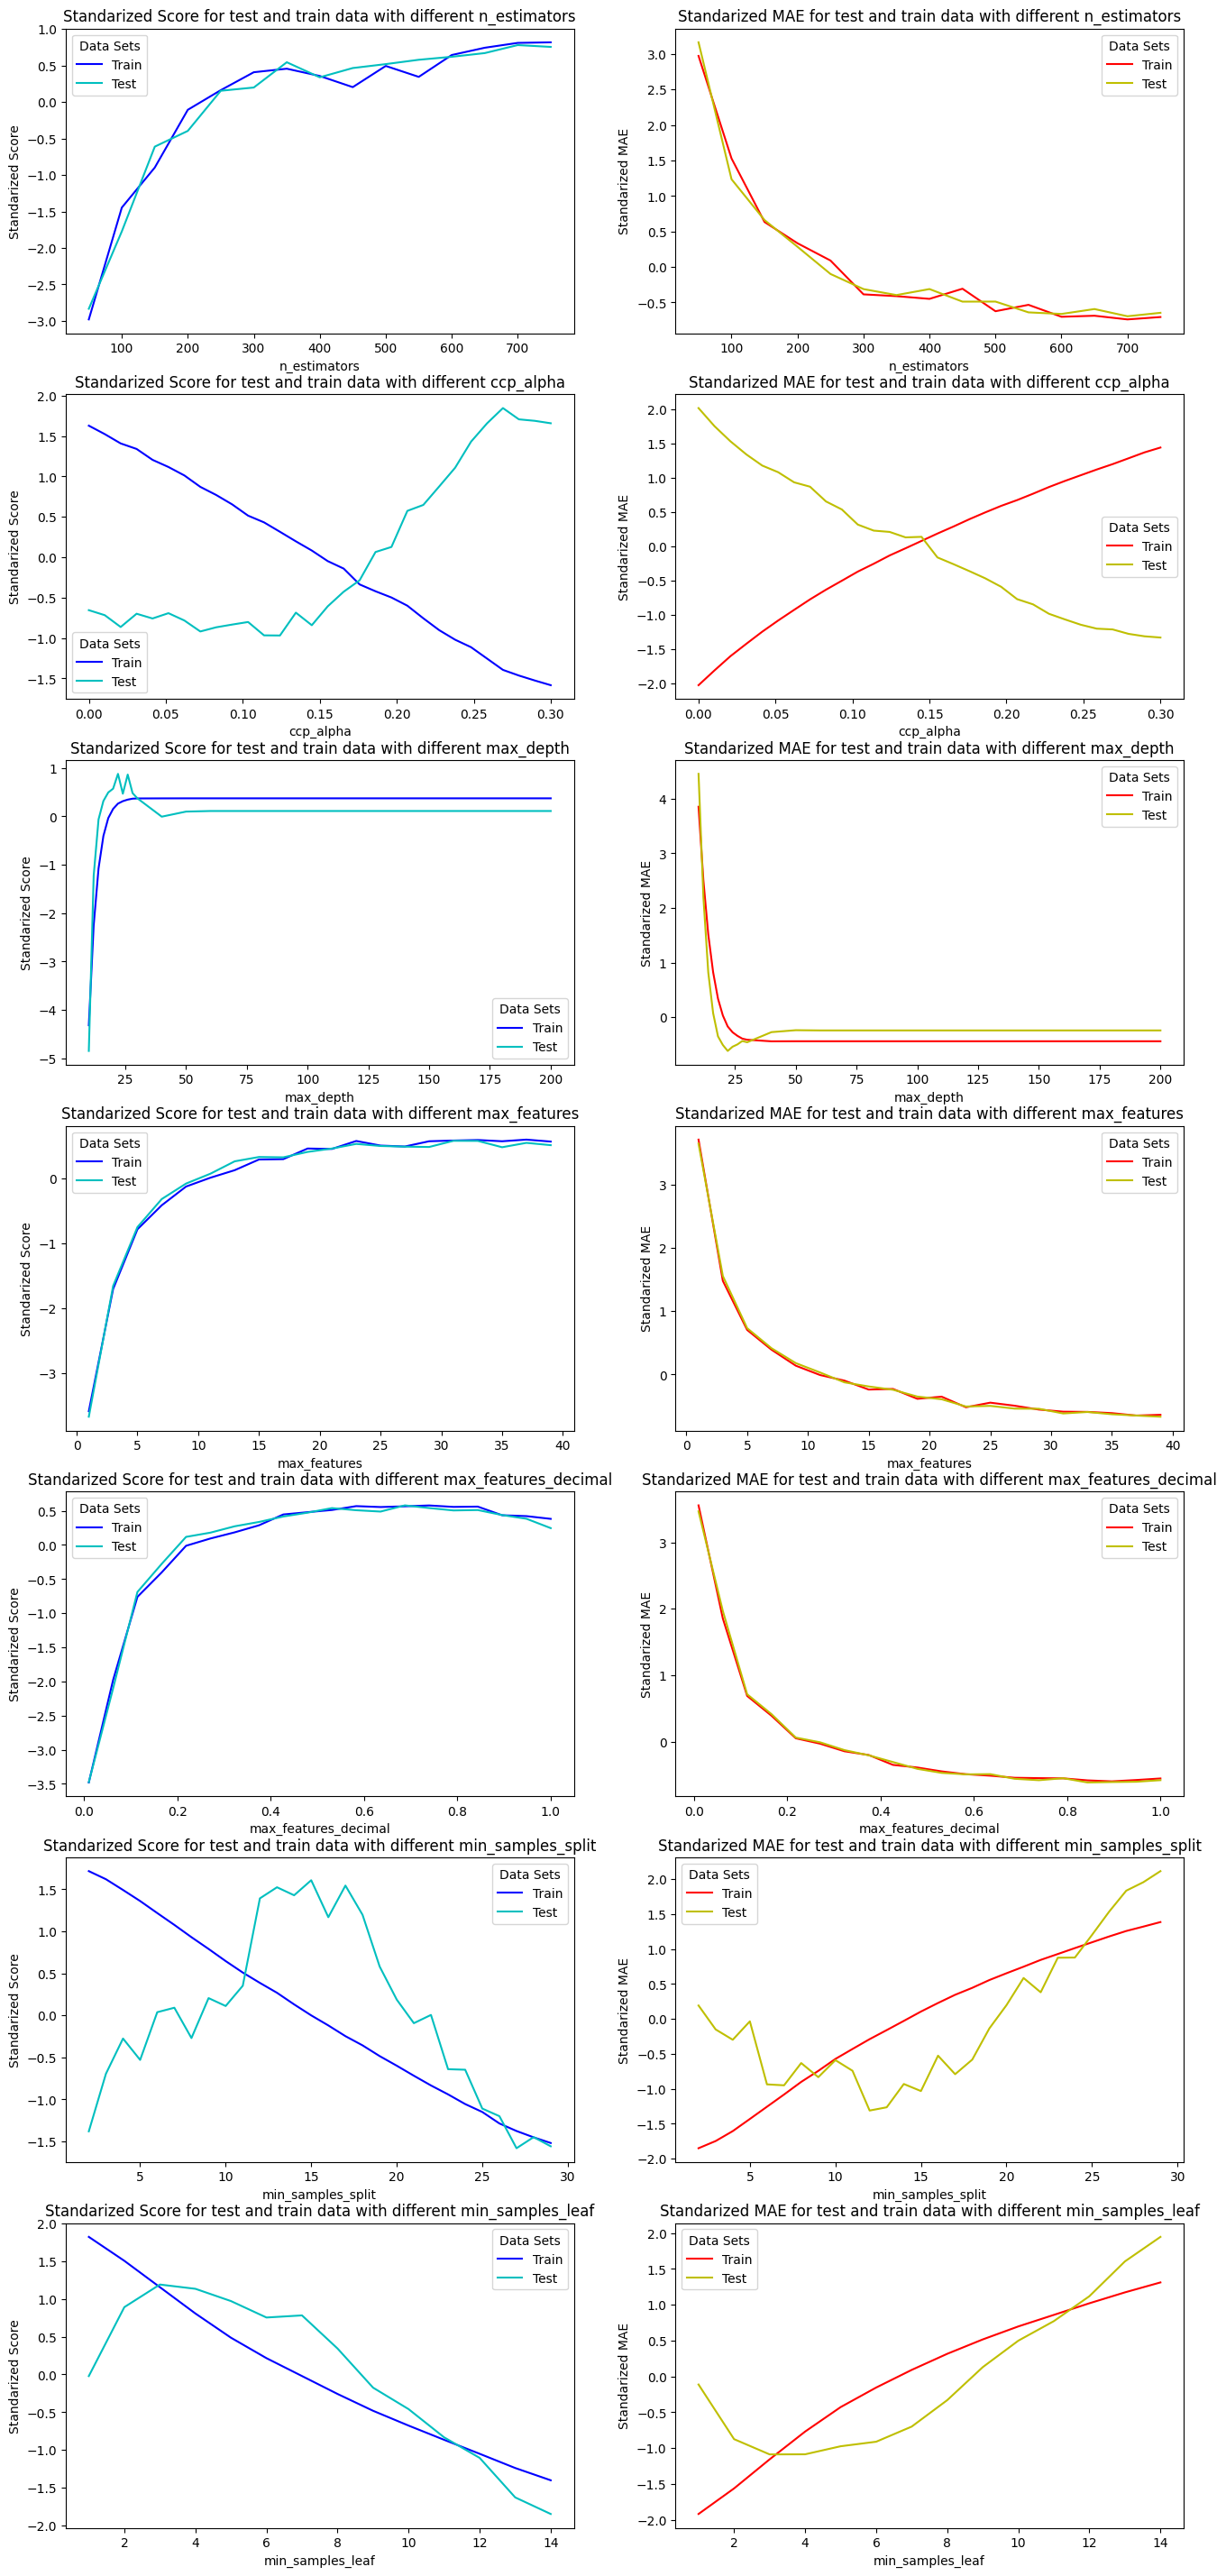

In [20]:
standardize_list = lambda x,list: (x - (sum(list) / len(list))) / np.std(list)

# Create a figure and axis, specify the figure size
fig, axs = plt.subplots(len(score_train_total), 2, figsize=(16, 36))#später 36

for n in range(len(score_train_total)):
    # Add the plot for MAE, standardized
    axs[n][0].plot(list(all_parameters_dict.values())[n], [standardize_list(i, score_train_total[n]) for i in score_train_total[n]],
                color="b", label="Train")
    axs[n][0].plot(list(all_parameters_dict.values())[n], [standardize_list(i, score_test_total[n]) for i in score_test_total[n]],
                color="c", label="Test")

    # Add the plot for score
    axs[n][1].plot(list(all_parameters_dict.values())[n], [standardize_list(i, MAE_train_total[n]) for i in MAE_train_total[n]], 
                color="r", label="Train")
    axs[n][1].plot(list(all_parameters_dict.values())[n], [standardize_list(i, MAE_test_total[n]) for i in MAE_test_total[n]], 
                 color="y", label="Test")
    # Add the legend
    axs[n][0].legend(title="Data Sets")
    axs[n][1].legend(title="Data Sets")

# Add the x- and y-axes labels
    axs[n][0].set_xlabel(f"{list(all_parameters_dict.keys())[n]}")
    axs[n][0].set_ylabel("Standarized Score")
    axs[n][1].set_xlabel(f"{list(all_parameters_dict.keys())[n]}")
    axs[n][1].set_ylabel("Standarized MAE")

# Add a title
    axs[n][0].set_title(f"Standarized Score for test and train data with different {list(all_parameters_dict.keys())[n]}")
    axs[n][1].set_title(f"Standarized MAE for test and train data with different {list(all_parameters_dict.keys())[n]}")




Text(0.5, 1.0, 'Second')

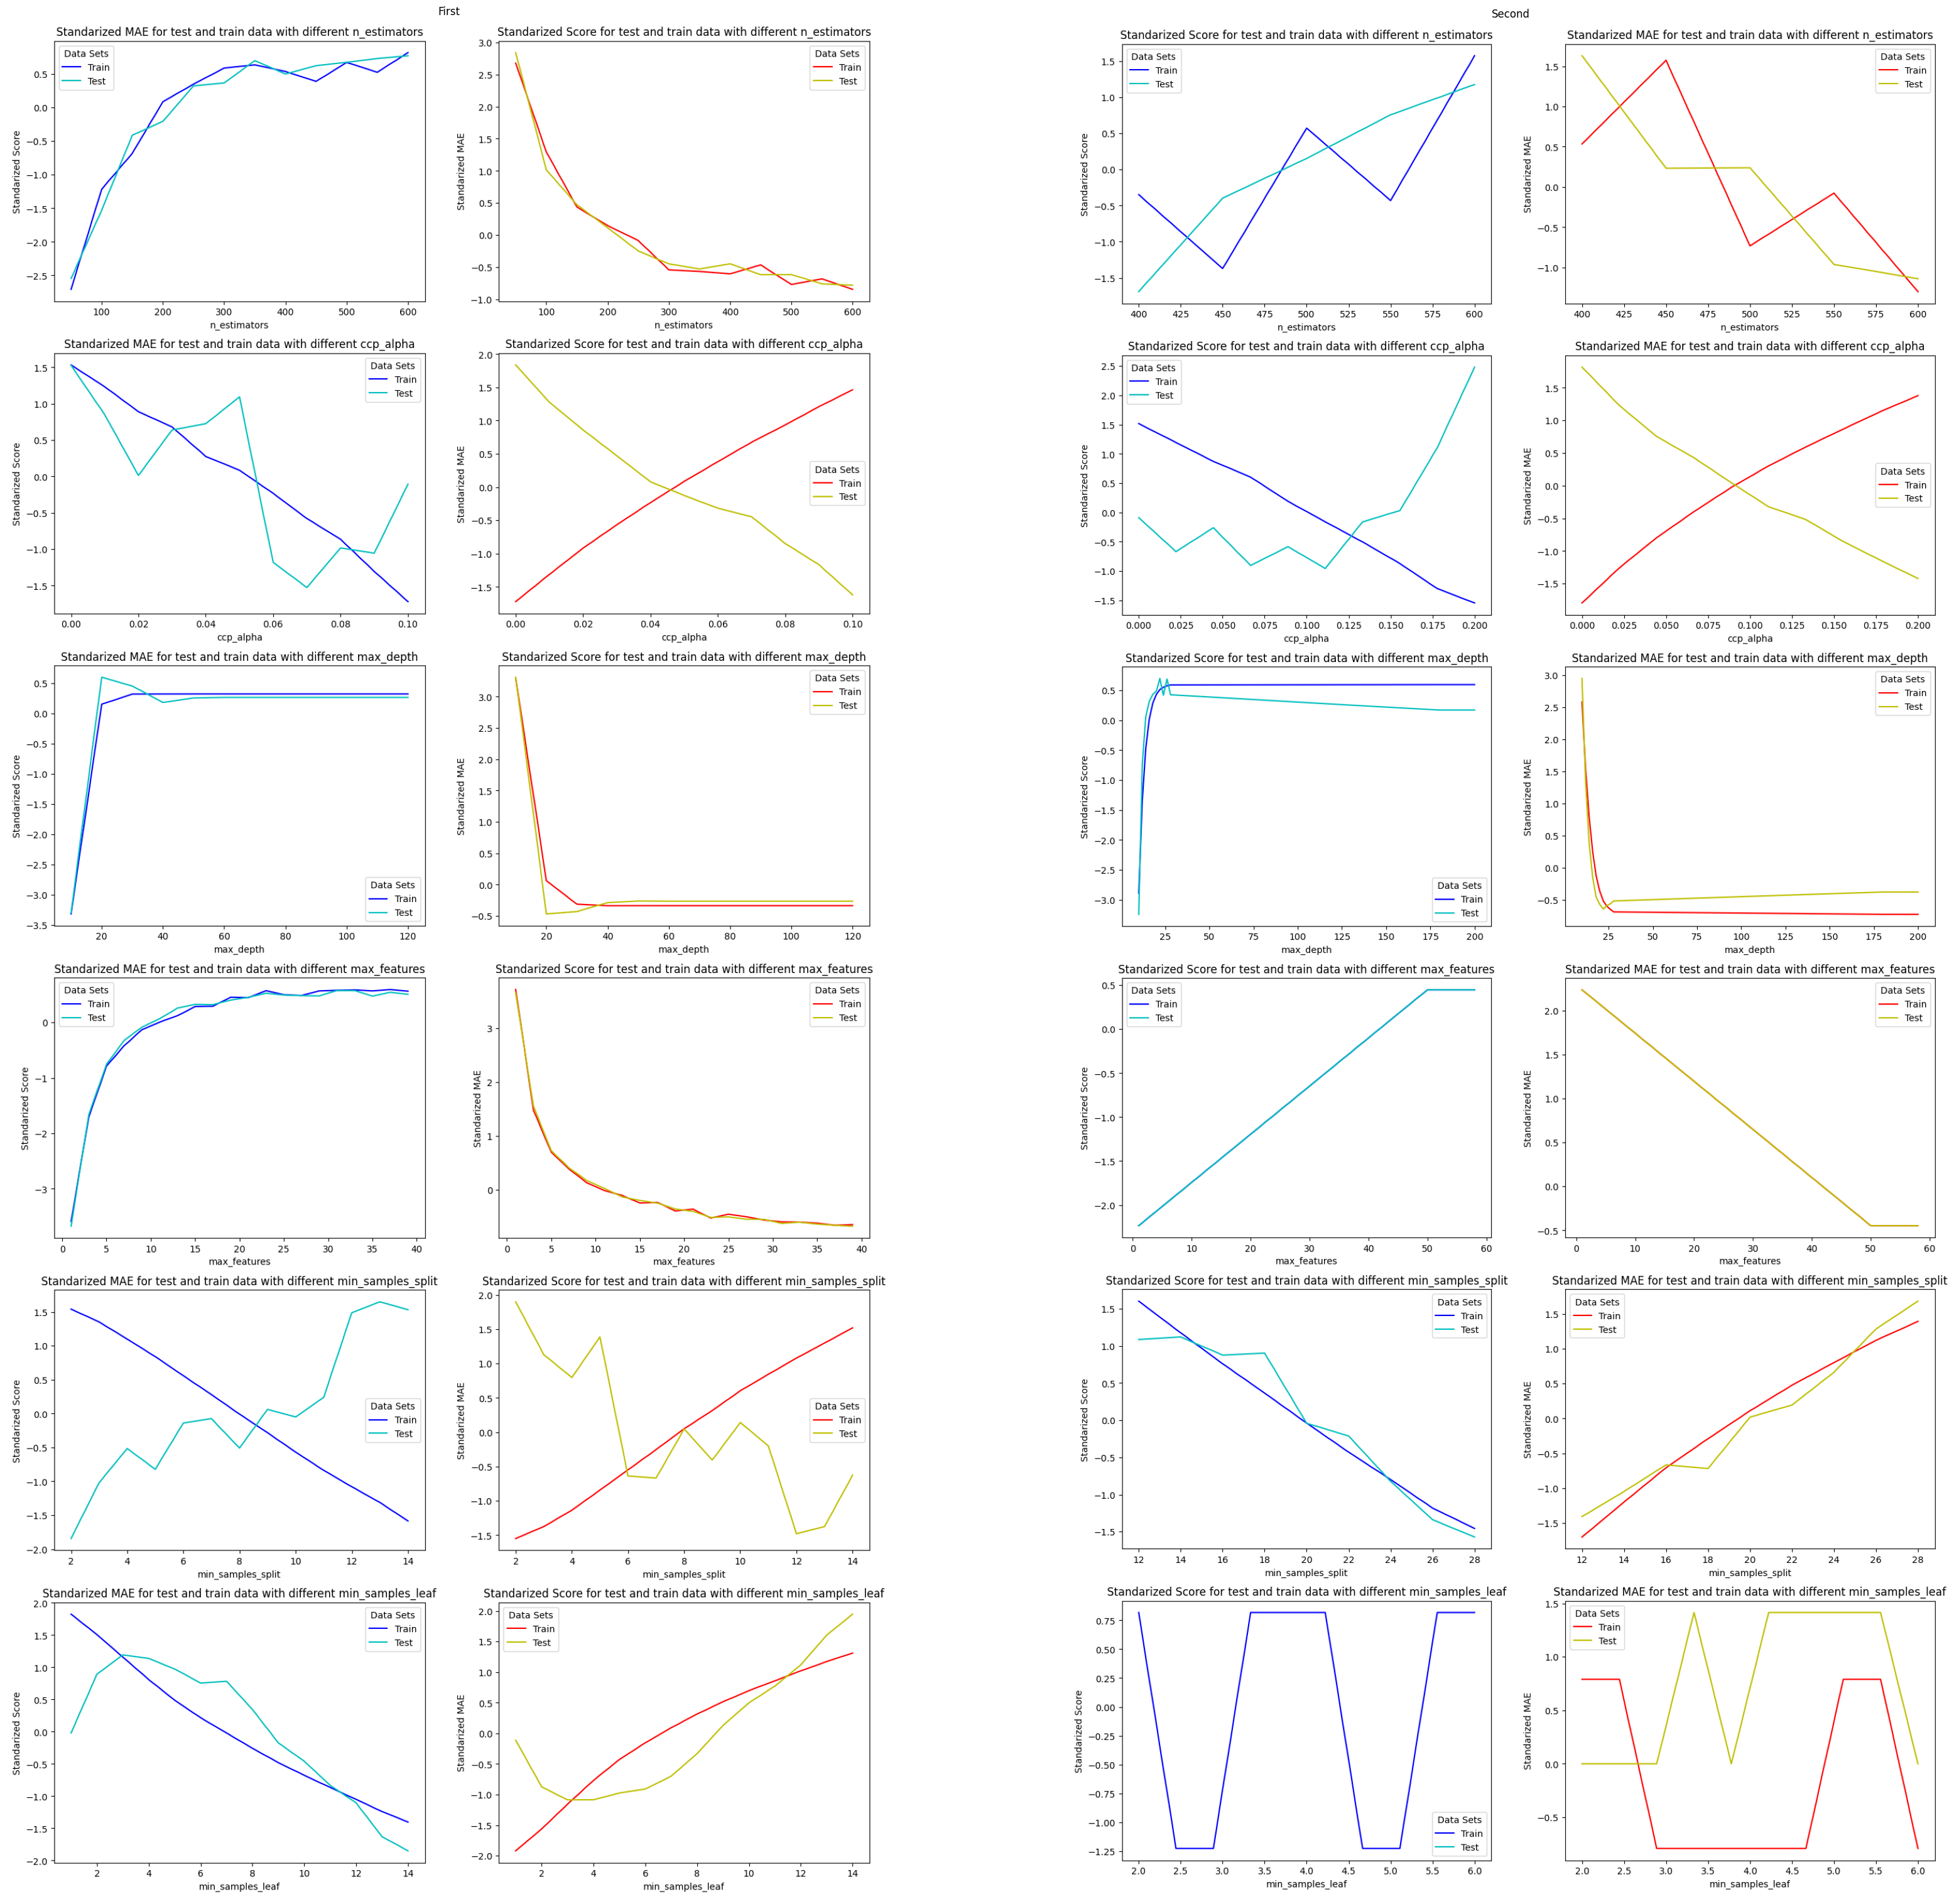

In [86]:
# create figure frome saved pictures
fig = plt.figure(figsize=(40, 40))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# reading images
img1 = Image.open("pictures/score_and_mae.png")
img2 = Image.open("pictures/score_and_mae2.png")
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")

In [7]:
img3 = Image.open("pictures/score_and_mae3.png")
img3.show()

### Optimisation for the whole Dataset

In [246]:
# Setting up the first Hyperparameters that should be tuned, due to the size of the Dataset only very few
# Number of trees in random forest
n_estimators = [int(x) for x in range(100, 501, 50)]
# Number of features to consider at every split
max_features = [0.25, 0.5, 1.0, None]
# Method to controll complexity 
ccp_alpha = [0, 0.001, 0.01, 0.1, 0.2, 0.3]

param_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "ccp_alpha": ccp_alpha}

param_standard = {"n_estimators": 100,
               "max_features": 1.0,
               "ccp_alpha": 0}



In [255]:
# Although they are influencing each other, this is too much for my Comuter, a proper optimization is shown below with a 
# subset and Cross validation takes too much computing power, due to the lage data:

# Setting up Lists for the MAE for all parameters
mae_test_ne = []
mae_test_mf = []
mae_test_ccp = []
# Setting a count for progress
i = 1


# Going through all n_estimators with a stanart Random Forest
for estimator in n_estimators:
    forest_optim_all = RandomForestRegressor(random_state=144, n_jobs=-1, n_estimators = estimator)

    forest_optim_all.fit(Xtrain, ytrain)

    mae_test_value = mean_absolute_error(ytest, forest_optim_all.predict(Xtest))
    mae_test_ne.append(mae_test_value)
    print(f"{i} from {len(n_estimators)} n_estimators done")
    i += 1

# Getting the best MAE for the n_estimator
mae_best_ne = np.argmin(mae_test_ne)

i = 1


# Going through all max_features with the found n_estimator
for features in max_features:
    forest_optim_all = RandomForestRegressor(random_state=144, n_jobs=-1, n_estimators = param_grid["n_estimators"][mae_best_ne],
                        max_features = features)

    forest_optim_all.fit(Xtrain, ytrain)

    mae_test_value = mean_absolute_error(ytest, forest_optim_all.predict(Xtest))
    mae_test_mf.append(mae_test_value)
    print(f"{i} from {len(max_features)} max_features done")
    i += 1

# Getting the best MAE for the max_features
mae_best_mf = np.argmin(mae_test_mf)

i = 1

# Going through all ccp_alpha with the found n_estimator and max_features
for ccp in ccp_alpha:
    forest_optim_all = RandomForestRegressor(random_state=144, n_jobs=-1,  n_estimators = param_grid["n_estimators"][mae_best_ne], 
                        max_features = param_grid["max_features"][mae_best_mf], ccp_alpha = ccp)

    forest_optim_all.fit(Xtrain, ytrain)

    mae_test_value = mean_absolute_error(ytest, forest_optim_all.predict(Xtest))
    mae_test_ccp.append(mae_test_value)
    print(f"{i} from {len(ccp_alpha)} ccp_alpha done")
    i += 1

# Getting the best MAE for the ccp_alpha
mae_best_ccp = np.argmin(mae_test_ccp)


# Creating the best Random forest with those found parameters
forest_optim_all = RandomForestRegressor(random_state=144, n_jobs=-1,  n_estimators = param_grid["n_estimators"][mae_best_ne], 
                        max_features = param_grid["max_features"][mae_best_mf], ccp_alpha = param_grid["ccp_alpha"][mae_best_ccp])
forest_optim_all.fit(Xtrain, ytrain)


# Calculating the MAE for this forest
mae_test_best = mean_absolute_error(ytest, forest_optim_all.predict(Xtest))

print(f"The best MAE Test is {mae_test_best:>10.2f} with, n_estimators: {param_grid['n_estimators'][mae_best_ne]}, max_features: {param_grid['max_features'][mae_best_mf]}, ccp_alpha: {param_grid['ccp_alpha'][mae_best_ccp]}")


1 from 9 n_estimators done
2 from 9 n_estimators done
3 from 9 n_estimators done
4 from 9 n_estimators done
5 from 9 n_estimators done
6 from 9 n_estimators done
7 from 9 n_estimators done
8 from 9 n_estimators done
9 from 9 n_estimators done
1 from 4 max_features done
2 from 4 max_features done
3 from 4 max_features done
4 from 4 max_features done
1 from 6 ccp_alpha done
2 from 6 ccp_alpha done
3 from 6 ccp_alpha done
4 from 6 ccp_alpha done
5 from 6 ccp_alpha done
6 from 6 ccp_alpha done
The best MAE Test is     338.19 with, n_estimators: 350, max_features: 1.0, ccp_alpha: 0.3


The best MAE Test is     338.19 with, n_estimators: 350, max_features: 1.0, ccp_alpha: 0.3

In [258]:
# Calculating the values for the found Forest
rf_mae_train_all, rf_mae_test_all, rf_score_train_all, rf_score_test_all = mae_score_measure_all(forest_optim_all)


In [294]:
# Measure the MAE and the Score for the test and the trining data
forest_optim_all_backup = RandomForestRegressor(random_state=144, n_jobs=-1,  n_estimators = 350, max_features = 1.0, ccp_alpha = 0.3)
forest_optim_all_backup.fit(Xtrain, ytrain)
rf_mae_train_all, rf_mae_test_all, rf_score_train_all, rf_score_test_all = mae_score_measure_all(forest_optim_all_backup)


In [295]:
#Checking if the best score needs to be updated
if rf_mae_train_all < rf_mae_train_best and rf_score_train_all > rf_score_train_best:
    rf_mae_train_best = rf_mae_train_all
    rf_score_train_best = rf_score_train_all
if rf_mae_test_all < rf_mae_test_best and rf_score_test_all > rf_score_test_best:
    rf_mae_test_best = rf_mae_test_all
    rf_score_test_best = rf_score_test_all

# Print results
print("             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---")
print()
print("-- Training data MAE --")
print(f"Random forest MAE   :   {rf_mae_train_all:>10.2f}     |   {rf_mae_train_baseline:>10.2f}      |   {rf_mae_train_best:>10.2f}  ")
print(f"Random forest Score :   {rf_score_train_all:>10.2f}     |   {rf_score_train_baseline:>10.2f}      |   {rf_score_train_best:>10.2f}  ")
print()
print("-- Validation data MAE --")
print(f"Random forest MAE   :   {rf_mae_test_all:>10.2f}      |   {rf_mae_test_baseline:>10.2f}     |   {rf_mae_test_best:>10.2f}  ")
print(f"Random forest Score :   {rf_score_test_all:>10.2f}      |   {rf_score_test_basline:>10.2f}     |   {rf_score_test_best:>10.2f}  ")

             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---

-- Training data MAE --
Random forest MAE   :       148.60     |       148.60      |       148.60  
Random forest Score :         0.99     |         0.99      |         0.99  

-- Validation data MAE --
Random forest MAE   :       338.19      |       340.00     |       338.19  
Random forest Score :         0.94      |         0.94     |         0.94  


             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---

-- Training data MAE --

Random forest MAE   :       150.18     |       148.55      |       148.55  

Random forest Score :         0.99     |         0.99      |         0.99  

-- Validation data MAE --

Random forest MAE   :       350.37      |       343.34     |       343.34
  
Random forest Score :         0.95      |         0.94     |         0.95 

# RandomizedSearchCV With Subset

In [226]:
# Load the data and clean the Columns
ped = pd.read_csv("data_clean_with_dummies.csv")
ped = ped.drop(["Unnamed: 0"], axis = 1)



ped_subset = ped.sample(frac=0.1, random_state=1)




# Define a new X with the squared feature k = 0.99, 57+46
X_subset = np.array(ped_subset[ped_subset.columns[57:103]])

X_subset = ped_subset[ped_subset.columns[57:103]]


# Output to predict
y_subset = ped_subset["pedestrians count"]

# Split the dataset into train and test sets
Xtrain_subset, Xtest_subset, ytrain_subset, ytest_subset = train_test_split(
    X_subset, y_subset, test_size=0.3, random_state=72)
## Hyperparametertuning
### Establish baseline
# Initiate Random Forest with standard parameters as a basline
forest_baseline_sub = RandomForestRegressor(random_state=144,n_jobs=-1)
forest_baseline_sub.fit(Xtrain_subset, ytrain_subset)



def mae_score_measure_sub(model):
    mae_train = mean_absolute_error(ytrain_subset, model.predict(Xtrain_subset))
    mae_test = mean_absolute_error(ytest_subset, model.predict(Xtest_subset))
    score_train = model.score(Xtrain_subset, ytrain_subset)
    score_test = model.score(Xtest_subset, ytest_subset)
    return mae_train, mae_test, score_train, score_test 


# Measure the MAE and the Score for the test and the trining data
rf_mae_train_baseline_subset, rf_mae_test_baseline_subset, rf_score_train_baseline_subset, rf_score_test_basline_subset = mae_score_measure_sub(forest_baseline_sub)


# Print results
print("----- Baseline MAE and Score -----")
print()
print("-- Training data MAE --")
print(f"Random forest MAE   :   {rf_mae_train_baseline_subset:>10.2f}")
print(f"Random forest Score :   {rf_score_train_baseline_subset:>10.2f}")
print()
print("-- Validation data MAE --")
print(f"Random forest MAE   : {rf_mae_test_baseline_subset:>10.2f}")
print(f"Random forest Score : {rf_score_test_basline_subset:>10.2f}")

# Setting the baseline as the best values and change it if better appear
rf_mae_train_best_subset = rf_mae_train_baseline_subset
rf_score_train_best_subset = rf_score_train_baseline_subset
rf_mae_test_best_subset = rf_mae_test_baseline_subset
rf_score_test_best_subset = rf_score_test_basline_subset

----- Baseline MAE and Score -----

-- Training data MAE --
Random forest MAE   :       196.44
Random forest Score :         0.98

-- Validation data MAE --
Random forest MAE   :     571.20
Random forest Score :       0.90


----- Baseline MAE and Score -----

-- Training data MAE --

Random forest MAE   :       196.44

Random forest Score :         0.98

-- Validation data MAE --

Random forest MAE   :     571.20

Random forest Score :       0.90

### New try?

#min_sample_split: the minimum required number of observations in node in order to split it  Defalut = 2
min_samples_split = [int(x) for x in range(2, 20, 2)]
#Minimum number of samples required at each leaf node
min_samples_leaf = [x for x in range(1, 8, 2)]
#Method of selecting samples for training each tree
bootstrap = [True, False]
max_features = [x for x in np.linspace(0.0, 1, 20)]
max_features.append(None)




#Number of trees in random forest
n_estimators = [x for x in range(100, 701, 50)]
#Method to controll complexity 
ccp_alpha = [x for x in np.linspace(0.0, 0.4, 40)]
#max_depth of a tree
max_depth = [int(x) for x in range(5, 30, 5)]
max_depth.append(None)
#Number of features to consider at every split
max_features = [x for x in np.linspace(0.0, 1, 5)]
max_features.extend([None])
#min_sample_split: the minimum required number of observations in node in order to split it  Defalut = 2
min_samples_split = [int(x) for x in range(5, 20, 5)]
#Minimum number of samples required at each leaf node
min_samples_leaf = [x for x in range(1, 8, 2)]
#Method of selecting samples for training each tree
bootstrap = [True, False]


In [69]:
# Number of trees in random forest
n_estimators = [x for x in range(300, 601, 50)]
# Method to controll complexity 
ccp_alpha = [x for x in np.linspace(0.0, 0.2, 10)]
#max_depth of a tree
max_depth = [int(x) for x in range(5, 30, 5)]
max_depth.append(None)
# Number of features to consider at every split
max_features = [x for x in np.linspace(0.0, 1, 5)]
max_features.extend([None])
# min_sample_split: the minimum required number of observations in node in order to split it  Defalut = 2
min_samples_split = [int(x) for x in range(5, 20, 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [x for x in range(1, 8, 2)]
# Method of selecting samples for training each tree
bootstrap = [True, False]



# Create the param grid
param_distributions = {"n_estimators": n_estimators,
               "ccp_alpha": ccp_alpha,
               "max_depth": max_depth,
               "max_features": max_features,
               "min_samples_leaf": min_samples_leaf,
               "min_samples_split":min_samples_split,
               "bootstrap": bootstrap
            }


# In total 1.248.000 possibileties
length = [len(values) for key, values in param_distributions.items()]
print(f"In total we have {np.prod(length)} possibleties")

forest = RandomForestRegressor(random_state=144)



In total we have 60480 possibleties


In [70]:
# Run grid search cross validation
random_search_forest_subset = RandomizedSearchCV(estimator = forest, param_distributions = param_distributions, verbose=2,n_iter = 5000, n_jobs = -1, cv = 4)
random_search_forest_subset.fit(Xtrain_subset, ytrain_subset)
# Finding out best parameteers
random_search_forest_subset.best_params_

Fitting 3 folds for each of 5000 candidates, totalling 15000 fits


c:\Users\Biebert\miniconda3\envs\dsf\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2664 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1335 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Biebert\miniconda3\envs\dsf\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Biebert\miniconda3\envs\dsf\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\Biebert\miniconda3\envs\dsf\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator)

{'n_estimators': 500,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 0.75,
 'max_depth': 25,
 'ccp_alpha': 0.2,
 'bootstrap': False}

{'n_estimators': 500,

 'min_samples_split': 15,

 'min_samples_leaf': 5,

 'max_features': 0.75,

 'max_depth': 25,

 'ccp_alpha': 0.2,

 'bootstrap': False}

In [152]:
# Measure the MAE and the Score for the test and the trining data
rf_mae_train_hype_rand_subset, rf_mae_test_hype_rand_subset, rf_score_train_hype_rand_subset, rf_score_test_hype_rand_subset = mae_score_measure_sub(random_search_forest_subset)

In [154]:
#When the Optimization is not saved this is the calculated forest:
forest_hype_rand_subset=RandomForestRegressor(random_state=144, n_jobs = -2, n_estimators= 500, min_samples_split= 15, min_samples_leaf = 5, max_features = 0.75, max_depth= 25, ccp_alpha =0.2, bootstrap= False)
forest_hype_rand_subset.fit(Xtrain_subset, ytrain_subset)

rf_mae_train_hype_rand_subset = mean_absolute_error(ytrain_subset, forest_hype_rand_subset.predict(Xtrain_subset))
rf_mae_test_hype_rand_subset = mean_absolute_error(ytest_subset, forest_hype_rand_subset.predict(Xtest_subset))
rf_score_train_hype_rand_subset = forest_hype_rand_subset.score(Xtrain_subset, ytrain_subset)
rf_score_test_hype_rand_subset = forest_hype_rand_subset.score(Xtest_subset, ytest_subset)

In [155]:
#Checking if the best score needs to be updated
if rf_mae_train_hype_rand_subset < rf_mae_train_best_subset and rf_score_train_hype_rand_subset > rf_score_train_best_subset:
    rf_mae_train_best_subset = rf_mae_train_hype_rand_subset
    rf_score_train_best_subset = rf_score_train_hype_rand_subset
if rf_mae_test_hype_rand_subset < rf_mae_test_best_subset and rf_score_test_hype_rand_subset > rf_score_test_best_subset:
    rf_mae_test_best_subset = rf_mae_test_hype_rand_subset
    rf_score_test_best_subset = rf_score_test_hype_rand_subset

# Print results
print("             --- Hyper Subset MAE and Score --- This is the basline Subset --- This is the best Subset ---")
print()
print("-- Training data MAE --")
print(f"Random forest MAE   :   {rf_mae_train_hype_rand_subset:>10.2f}     |   {rf_mae_train_baseline_subset:>10.2f}      |   {rf_mae_train_best_subset:>10.2f}  ")
print(f"Random forest Score :   {rf_score_train_hype_rand_subset:>10.2f}     |   {rf_score_train_baseline_subset:>10.2f}      |   {rf_score_train_best_subset:>10.2f}  ")
print()
print("-- Validation data MAE --")
print(f"Random forest MAE   :   {rf_mae_test_hype_rand_subset:>10.2f}      |   {rf_mae_test_baseline_subset:>10.2f}     |   {rf_mae_test_best_subset:>10.2f}  ")
print(f"Random forest Score :   {rf_score_test_hype_rand_subset:>10.2f}      |   {rf_score_test_basline_subset:>10.2f}     |   {rf_score_test_best_subset:>10.2f}  ")

             --- Hyper Subset MAE and Score --- This is the basline Subset --- This is the best Subset ---

-- Training data MAE --
Random forest MAE   :       238.35     |       196.44      |        49.34  
Random forest Score :         0.97     |         0.98      |         1.00  

-- Validation data MAE --
Random forest MAE   :       588.15      |       571.20     |       571.20  
Random forest Score :         0.89      |         0.90     |         0.90  


             --- Hyper1 MAE and Score --- This is the basline --- This is the best ---

-- Training data MAE --

Random forest MAE   :      2656.37     |       148.55      |       148.55  

Random forest Score :        -0.00     |         0.99      |         0.99  

-- Validation data MAE --

Random forest MAE   :      2664.45      |       343.34     |       343.34  

Random forest Score :        -0.00      |         0.94     |         0.94  

### More Specific with GridSearchCV

In [223]:
# Number of trees in random forest, Randomized was 500
######################################################n_estimators = [500, 450, 100]
n_estimators = [550,500]
# Method to controll complexity, Randomized was 0.2
######################################################ccp_alpha = [0.3, 0.2, 0.1, 0]
ccp_alpha = [0.3, 0.2]
#max_depth of a tree, Randomized was 25
max_depth = [25, None]
# Number of features to consider at every split, Randomized was 0.75
max_features = [0.75, None]
# min_sample_split: the minimum required number of observations in node in order to split it, Randomized was 15
min_samples_split = [20, 2]
# Minimum number of samples required at each leaf node, Randomized was 5
min_samples_leaf = [5, 1]
# Method of selecting samples for training each tree, Randomized was False
bootstrap = [False, True]



# Create the param grid
param_distributions = {"n_estimators": n_estimators,
               "ccp_alpha": ccp_alpha,
               "max_depth": max_depth,
               "max_features": max_features,
               "min_samples_leaf": min_samples_leaf,
               "min_samples_split":min_samples_split,
               "bootstrap": bootstrap
            }


# In total possibileties
length = [len(values) for key, values in param_distributions.items()]
print(f"In total we have {np.prod(length)} possibleties")
forest = RandomForestRegressor(random_state=144)



In total we have 64 possibleties


In [224]:
# Run grid search cross validation
grid_search_forest_subset = GridSearchCV(estimator = forest, param_grid = param_distributions, verbose=2, n_jobs = -1, cv = 5)
grid_search_forest_subset.fit(Xtrain_subset, ytrain_subset)
# Finding out best parameteers
grid_search_forest_subset.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'bootstrap': True,
 'ccp_alpha': 0.2,
 'max_depth': None,
 'max_features': 0.75,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 550}

{'bootstrap': True,
 
 'ccp_alpha': 0.2,
 
 'max_depth': None,
 
 'max_features': None,
 
 'min_samples_leaf': 1,
 
 'min_samples_split': 2,
 
 'n_estimators': 550}

In [228]:
# Measure the MAE and the Score for the test and the trining data
rf_mae_train_hype_search_subset, rf_mae_test_hype_search_subset, rf_score_train_hype_search_subset, rf_score_test_hype_search_subset = mae_score_measure_sub(grid_search_forest_subset)


In [241]:
#When the Optimization is not saved this is the calculated forest:
forest_hype_grid_subset=RandomForestRegressor(random_state=144, n_jobs = -1, n_estimators= 550, min_samples_split= 2, min_samples_leaf = 1, max_features = None, max_depth= None, ccp_alpha =0.2, bootstrap= True)
forest_hype_grid_subset.fit(Xtrain_subset, ytrain_subset)


rf_mae_train_hype_search_subset = mean_absolute_error(ytrain_subset, forest_hype_grid_subset.predict(Xtrain_subset))
rf_mae_test_hype_search_subset = mean_absolute_error(ytest_subset, forest_hype_grid_subset.predict(Xtest_subset))
rf_score_train_hype_search_subset = forest_hype_grid_subset.score(Xtrain_subset, ytrain_subset)
rf_score_test_hype_search_subset = forest_hype_grid_subset.score(Xtest_subset, ytest_subset)

In [242]:
#Checking if the best score needs to be updated
if rf_mae_train_hype_search_subset < rf_mae_train_best_subset and rf_score_train_hype_search_subset > rf_score_train_best_subset:
    rf_mae_train_best_subset = rf_mae_train_hype_search_subset
    rf_score_train_best_subset = rf_score_train_hype_search_subset
if rf_mae_test_hype_search_subset < rf_mae_test_best_subset and rf_score_test_hype_search_subset > rf_score_test_best_subset:
    rf_mae_test_best_subset = rf_mae_test_hype_search_subset
    rf_score_test_best_subset = rf_score_test_hype_search_subset

# Print results
print("             --- Hyper Subset MAE and Score --- This is the basline Subset --- This is the best Subset ---")
print()
print("-- Training data MAE --")
print(f"Random forest MAE   :   {rf_mae_train_hype_search_subset:>10.2f}     |   {rf_mae_train_baseline_subset:>10.2f}      |   {rf_mae_train_best_subset:>10.2f}  ")
print(f"Random forest Score :   {rf_score_train_hype_search_subset:>10.2f}     |   {rf_score_train_baseline_subset:>10.2f}      |   {rf_score_train_best_subset:>10.2f}  ")
print()
print("-- Validation data MAE --")
print(f"Random forest MAE   :   {rf_mae_test_hype_search_subset:>10.2f}      |   {rf_mae_test_baseline_subset:>10.2f}     |   {rf_mae_test_best_subset:>10.2f}  ")
print(f"Random forest Score :   {rf_score_test_hype_search_subset:>10.2f}      |   {rf_score_test_basline_subset:>10.2f}     |   {rf_score_test_best_subset:>10.2f}  ")

             --- Hyper Subset MAE and Score --- This is the basline Subset --- This is the best Subset ---

-- Training data MAE --
Random forest MAE   :       192.29     |       196.44      |       195.36  
Random forest Score :         0.98     |         0.98      |         0.98  

-- Validation data MAE --
Random forest MAE   :       563.03      |       571.20     |       563.03  
Random forest Score :         0.90      |         0.90     |         0.90  


             --- Hyper Subset MAE and Score --- This is the basline Subset --- This is the best Subset ---

-- Training data MAE --

Random forest MAE   :       192.29     |       196.44      |       195.36  

Random forest Score :         0.98     |         0.98      |         0.98  

-- Validation data MAE --

Random forest MAE   :       563.03      |       571.20     |       563.03  

Random forest Score :         0.90      |         0.90     |         0.90

# Visualization

In [297]:
ped = pd.read_csv("data_clean_with_dummies.csv")
ped = ped.drop(["Unnamed: 0"], axis = 1)

# Define a new X with the squared feature k = 0.99, 57+46
X = np.array(ped[ped.columns[57:103]])

X = ped[ped.columns[57:103]]

In [298]:
# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)




In [299]:
# Initiate Random Forest with standard parameters as a basline
best_forest = RandomForestRegressor(random_state=144, n_jobs=-1,  n_estimators = 350, max_features = 1.0, ccp_alpha = 0.3)
best_forest.fit(Xtrain, ytrain)

RandomForestRegressor(ccp_alpha=0.3, n_estimators=350, n_jobs=-1,
                      random_state=144)

In [300]:
print(
mean_absolute_error(ytrain, best_forest.predict(Xtrain)),
mean_absolute_error(ytest, best_forest.predict(Xtest)))

148.60272647393512 338.18860250351867


### This is with all data

In [301]:
split = [200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000]
lower = 0
seperate_parts = []
for uper in split:
    part = ped.loc[(ped["pedestrians count"] >= lower) & (ped["pedestrians count"] < uper)]
    lower = uper
    seperate_parts.append(part)



### This is with Test Data

In [303]:
Xtest_new = Xtest.reset_index(drop=True)
ytest_new = ytest.reset_index(drop=True)

In [304]:
split = [200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000]
lower = 0
seperate_parts_y = []
seperate_parts_x = []



for uper in split:
    y_part = ytest_new[(ytest_new >= lower) & (ytest_new < uper)]
    index_for_x = y_part.index[0:len(y_part)]
    x_part = Xtest_new.loc[index_for_x,]
    lower = uper
    seperate_parts_y.append(y_part)
    seperate_parts_x.append(x_part)



### outlieer are

In [54]:
# seperate_parts_y[20] #2
# seperate_parts_y[19] #2
seperate_parts_y[18] #1


426     16679
1977    16124
2428    16993
3656    16093
Name: pedestrians count, dtype: int64

In [56]:
ped.loc[ped["pedestrians count"] == 16093]

date      time  pedestrians count  temperature in ºc  holiday  \
14581  2019-12-30  15:00:00              16093          -0.878482        0   

       school holiday  weekday_Friday  weekday_Monday  weekday_Saturday  \
14581               1               0               1                 0   

       weekday_Sunday  ...      PC45      PC46      PC47      PC48      PC49  \
14581               0  ... -0.266164 -0.179092 -0.033771  0.009799  0.013349   

           PC50          PC51          PC52          PC53          PC54  
14581 -0.007346  1.672347e-16  1.765800e-17  1.671621e-17  4.459840e-17  

[1 rows x 111 columns]

2019-11-29 und 30 weit drunter gewesen (Weihnachten?)
Silvester

### Graph

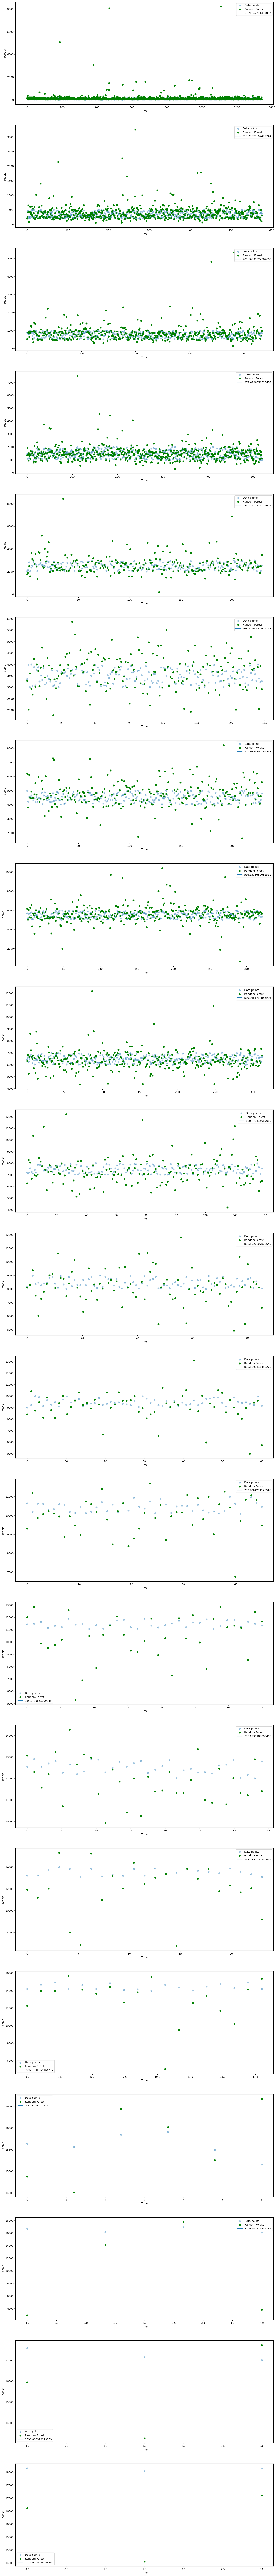

In [305]:
# Set up the canvas
fig, axs = plt.subplots(len(seperate_parts),1,figsize=(18, 180))
# Make a scatterplot with temperature on the x-axis and number of rentals on the y axis

#################################################
#THIS IS FOR TEST ONLY
#################################################
# for i in range(len(seperate_parts_y)):
#     X_calc = seperate_parts_x[i]#[seperate_parts_x[i].columns[57:103]]
#     # Output to predict
#     y_graph = seperate_parts_y[i]#["pedestrians count"]

#     x_graph = np.linspace(0, len(y_graph), num=len(y_graph))

#     y_pred_graph = best_forest.predict(X_calc)

#     axs[i].scatter(x_graph, y_graph, alpha=0.4, label="Data points")
#     axs[i].scatter(x_graph, y_pred_graph, label="Random Forest", color="green", lw=1)
#     axs[i].plot([], [], "" ,label=f"{mean_absolute_error(y_graph, y_pred_graph)}")


# # Add the predictions of our model using a scatter plot
# # Add labels on the axes, a legend, and a grid
# for i in range(len(seperate_parts)):
#     axs[i].legend()
#     axs[i].set_xlabel("Time")
#     axs[i].set_ylabel("People")

#################################################
# THIS IS FOR ALL
#################################################
# for i in range(len(seperate_parts)):
#     X_calc = seperate_parts[i][seperate_parts[i].columns[57:103]]
#     # Output to predict
#     y_graph = seperate_parts[i]["pedestrians count"]

#     x_graph = np.linspace(0, len(y_graph), num=len(y_graph))

#     y_pred_graph = best_forest.predict(X_calc)

#     axs[i].scatter(x_graph, y_graph, alpha=0.4, label="Data points")
#     axs[i].scatter(x_graph, y_pred_graph, label="Random Forest", color="green", lw=1)
#     axs[i].plot([], [], "" ,label=f"{mean_absolute_error(y_graph, y_pred_graph)}")


# # Add the predictions of our model using a scatter plot
# # Add labels on the axes, a legend, and a grid
# for i in range(len(seperate_parts)):
#     axs[i].legend()
#     axs[i].set_xlabel("Time")
#     axs[i].set_ylabel("People")

Text(0.5, 1.0, 'All')

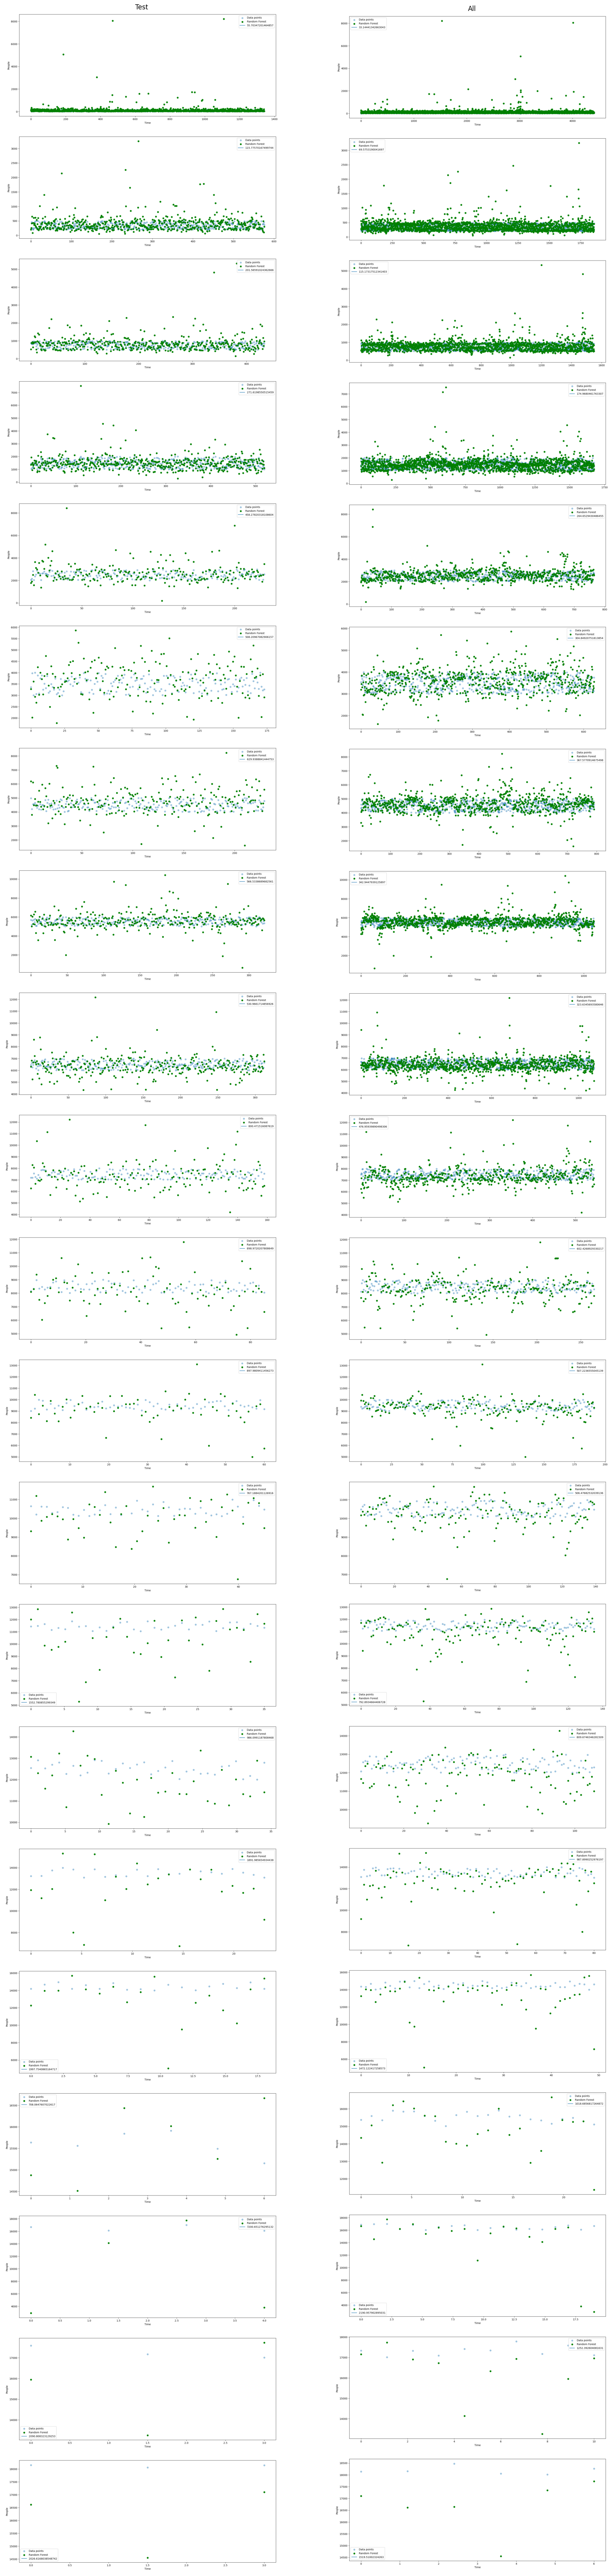

In [306]:
# create figure frome saved pictures
fig = plt.figure(figsize=(20, 200))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# reading images
img1 = Image.open("pictures/per_people_test_only.png")
img2 = Image.open("pictures/per_people.png")
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("Test")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("All")